<a href="https://colab.research.google.com/github/Srilaxmi1904/ML_Projects/blob/main/Naive_Bayes_on_lung_cancer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## READING THE DATA

In [ ]:
import pandas as pd
data=pd.read_csv('/content/lung_cancer_examples.csv')
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [ ]:
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [ ]:
data.isna().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

## REMOVING UNNECESSARY COLUMNS

In [ ]:
data=data.drop(['Name','Surname'],axis=1)
data.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


## COUNTING THE RESULT (OUTPUT) AND PLOTTING IT IN A BAR GRAPH

In [ ]:
counts=data['Result'].value_counts().reset_index()
counts

,index,Result
0,0,31
1,1,28


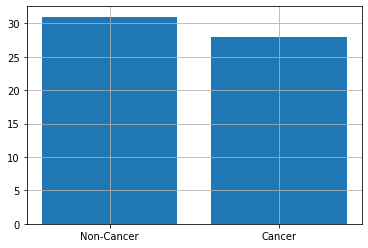

In [ ]:
import matplotlib.pyplot as plt
can=['Non-Cancer','Cancer']
plt.bar(can,counts['Result'])
plt.grid()

## SEPARATING X(INPUT) AND Y(OUTPUT) VALUES

In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
x

array([[35,  3,  5,  4],
       [27, 20,  2,  5],
       [30,  0,  5,  2],
       [28,  0,  8,  1],
       [68,  4,  5,  6],
       [34,  0, 10,  0],
       [58, 15, 10,  0],
       [22, 12,  5,  2],
       [45,  2,  6,  0],
       [52, 18,  4,  5],
       [33,  4,  8,  0],
       [18, 10,  6,  3],
       [25,  2,  5,  1],
       [28, 20,  2,  8],
       [34, 25,  4,  8],
       [39, 18,  8,  1],
       [42, 22,  3,  5],
       [19, 12,  8,  0],
       [62,  5,  4,  3],
       [73, 10,  7,  6],
       [55, 15,  1,  3],
       [33,  8,  8,  1],
       [22, 20,  6,  2],
       [44,  5,  8,  1],
       [77,  3,  2,  6],
       [21, 20,  5,  3],
       [37, 15,  6,  2],
       [34, 12,  8,  0],
       [55, 20,  1,  4],
       [40, 20,  2,  7],
       [36, 13,  5,  2],
       [56, 20,  3,  3],
       [47, 15,  1,  8],
       [62, 25,  3,  4],
       [26, 10,  7,  2],
       [25, 20,  8,  2],
       [59, 20,  3,  4],
       [62, 15,  5,  5],
       [33, 25,  8,  2],
       [37, 10,  5,  3],


## SEPARATING THE DATA AS TRAINING AND TESTING DATA

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[26, 13,  6,  1],
       [73, 10,  7,  6],
       [36, 13,  5,  2],
       [42, 12,  6,  2],
       [39, 15,  7,  2],
       [77, 20,  5,  4],
       [39, 18,  8,  1],
       [52, 18,  4,  5],
       [34, 12,  8,  0],
       [37, 15,  6,  2],
       [42, 22,  3,  5],
       [77,  3,  2,  6],
       [62, 25,  3,  4],
       [75, 15,  3,  5],
       [47, 12,  8,  0],
       [18, 10,  6,  3],
       [47, 15,  1,  8],
       [26, 34,  1,  8],
       [50, 20,  2,  4],
       [62, 15,  5,  5],
       [40, 20,  2,  7],
       [63, 20,  4,  5],
       [27, 20,  2,  5],
       [33,  8,  8,  1],
       [30,  0,  5,  2],
       [31, 20,  9,  4],
       [37, 10,  5,  3],
       [25, 20,  8,  2],
       [44,  5,  8,  1],
       [53, 20,  6,  3],
       [33,  4,  8,  0],
       [22, 20,  6,  2],
       [62,  5,  4,  3],
       [51, 25,  9,  0],
       [55, 15,  1,  3],
       [22, 12,  5,  2],
       [69, 20,  5,  4],
       [34, 25,  4,  8],
       [55, 20,  1,  4],
       [44, 30,  1,  6],


## NORMALIZATION OF THE DATA

In [ ]:
from sklearn.preprocessing import StandardScaler
scal=StandardScaler()
scal.fit(x_train)
x_train=scal.transform(x_train)
x_test=scal.transform(x_test)
x_train

array([[-1.15393627, -0.43269425,  0.40496913, -1.08797778],
       [ 1.7796194 , -0.84848639,  0.80993827,  1.1649055 ],
       [-0.52977549, -0.43269425,  0.        , -0.63740112],
       [-0.15527902, -0.57129163,  0.40496913, -0.63740112],
       [-0.34252726, -0.1554995 ,  0.80993827, -0.63740112],
       [ 2.02928371,  0.53748739,  0.        ,  0.26375219],
       [-0.34252726,  0.26029264,  1.2149074 , -1.08797778],
       [ 0.46888176,  0.26029264, -0.40496913,  0.71432885],
       [-0.65460765, -0.57129163,  1.2149074 , -1.53855444],
       [-0.46735941, -0.1554995 ,  0.40496913, -0.63740112],
       [-0.15527902,  0.81468215, -0.80993827,  0.71432885],
       [ 2.02928371, -1.81866804, -1.2149074 ,  1.1649055 ],
       [ 1.09304254,  1.23047428, -0.80993827,  0.26375219],
       [ 1.90445155, -0.1554995 , -0.80993827,  0.71432885],
       [ 0.15680137, -0.57129163,  1.2149074 , -1.53855444],
       [-1.6532649 , -0.84848639,  0.40496913, -0.18682447],
       [ 0.15680137, -0.

## IMPLEMENTING THE ALGORITHM (GaussianNB as the data has numerical inputs)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

pred=model.predict(x_test)
pred

print(model.predict([[37,15,6,2]]))

[1]


## PERFORMANCE EVALUATION OF THE MODEL

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
con=confusion_matrix(y_test,pred)
con

score=accuracy_score(y_test,pred)
score

0.9444444444444444

In [ ]:
con

array([[11,  0],
       [ 1,  6]])